In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


In [47]:
data = pd.read_csv("Documents\house.csv")

In [48]:
data

,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,CentralAir,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
0,CollgCr,7,2003,2003,856,Y,1710,3,Gd,8,0,2,548,208500
1,Veenker,6,1976,1976,1262,Y,1262,3,TA,6,1,2,460,181500
2,CollgCr,7,2001,2002,920,Y,1786,3,Gd,6,1,2,608,223500
3,Crawfor,7,1915,1970,756,Y,1717,3,Gd,7,1,3,642,140000
4,NoRidge,8,2000,2000,1145,Y,2198,4,Gd,9,1,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,6,1999,2000,953,Y,1647,3,TA,7,1,2,460,175000
1456,NWAmes,6,1978,1988,1542,Y,2073,3,TA,7,2,2,500,210000
1457,Crawfor,7,1941,2006,1152,Y,2340,4,Gd,9,2,1,252,266500
1458,NAmes,5,1950,1996,1078,Y,1078,2,Gd,5,0,1,240,142125


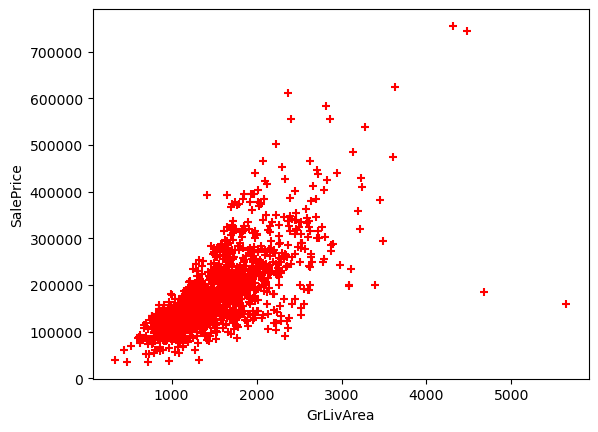

In [49]:
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(data.GrLivArea,data.SalePrice,color='red',marker='+',)
plt.show()

In [50]:
data.GrLivArea.min()

334

In [63]:
data.SalePrice.min()

34900

In [64]:
data.SalePrice.max()

755000

In [51]:
data.GrLivArea.max()

5642

In [52]:
Feature = data.drop(['SalePrice','CentralAir','KitchenQual','Neighborhood'] ,axis='columns')
Feature

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea
0,7,2003,2003,856,1710,3,8,0,2,548
1,6,1976,1976,1262,1262,3,6,1,2,460
2,7,2001,2002,920,1786,3,6,1,2,608
3,7,1915,1970,756,1717,3,7,1,3,642
4,8,2000,2000,1145,2198,4,9,1,3,836
...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,1647,3,7,1,2,460
1456,6,1978,1988,1542,2073,3,7,2,2,500
1457,7,1941,2006,1152,2340,4,9,2,1,252
1458,5,1950,1996,1078,1078,2,5,0,1,240


In [53]:
price = data.SalePrice
price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [54]:
model = linear_model.LinearRegression()
model.fit (Feature,price)

LinearRegression()

In [55]:
model.predict([[7, 2003, 2003, 856, 2000, 4, 8, 1, 2, 600]])

array([230584.76914424])

In [57]:
y_predicted = model.predict(Feature)

In [58]:
y_predicted

array([214557.53634638, 173786.87100965, 223587.59847007, ...,
       237850.31247492, 124881.8230665 , 128481.77053369])

In [59]:
price.values.flatten()

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [65]:
mean_absolute_error(y_predicted,price)

23737.620182955663

In [67]:
for i in range(len(y_predicted)):
    print(y_predicted[i],price[i] , 'error = ' ,abs(y_predicted[i] - price [i]))

214557.53634638456 208500 error =  6057.536346384557
173786.87100965087 181500 error =  7713.128990349127
223587.59847006737 223500 error =  87.59847006737255
197748.52008735412 140000 error =  57748.52008735412
279837.095383188 250000 error =  29837.09538318799
162870.985328316 143000 error =  19870.98532831599
262528.30393023044 307000 error =  44471.69606976956
238345.3560419837 200000 error =  38345.3560419837
213889.59889021446 129900 error =  83989.59889021446
125556.67568100919 118000 error =  7556.67568100919
111464.96531710657 129500 error =  18035.034682893427
321083.7860844957 345000 error =  23916.213915504282
105030.55579238781 144000 error =  38969.44420761219
243899.52468388388 279500 error =  35600.47531611612
159702.88751744013 157000 error =  2702.887517440133
153839.9021632357 132000 error =  21839.902163235703
157216.47763345507 149000 error =  8216.47763345507
102195.50736947265 90000 error =  12195.507369472645
152914.90518217697 159000 error =  6085.094817823032
